In [1]:
import numpy as np
import pandas as pd
from scipy.stats import truncnorm

# Set all random seeds for reproducibility
np.random.seed(42)
random_seed = 42

# List of all Nigerian states
nigerian_states = sorted([
    'Abia', 'Adamawa', 'Akwa Ibom', 'Anambra', 'Bauchi', 'Bayelsa', 'Benue', 'Borno',
    'Cross River', 'Delta', 'Ebonyi', 'Edo', 'Ekiti', 'Enugu', 'Federal Capital Territory',
    'Gombe', 'Imo', 'Jigawa', 'Kaduna', 'Kano', 'Katsina', 'Kebbi', 'Kogi', 'Kwara',
    'Lagos', 'Nasarawa', 'Niger', 'Ogun', 'Ondo', 'Osun', 'Oyo', 'Plateau', 'Rivers',
    'Sokoto', 'Taraba', 'Yobe', 'Zamfara'
])

# Define regional classifications
coastal_states = ['Lagos', 'Delta', 'Rivers', 'Bayelsa', 'Akwa Ibom']
northern_states = ['Sokoto', 'Katsina', 'Kano', 'Jigawa', 'Yobe', 'Borno']

# Soil types and their properties
soil_types = ['Sandy', 'Loamy', 'Clay', 'Silt', 'Laterite']
soil_modifiers = {
    'Loamy': 1.3,  # Best for agriculture
    'Clay': 0.9,
    'Sandy': 0.8,
    'Silt': 1.0,
    'Laterite': 0.7
}

def get_truncated_normal(mean, sd, low, upp, size=1):
    """Generate values from truncated normal distribution"""
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd
    ).rvs(size, random_state=random_seed)

def calculate_yield_factor(soil, rainfall, temp, state, entry_id):
    """Calculate the yield modification factor based on conditions"""
    yield_factor = 1.0
    
    # Apply soil modifier
    yield_factor *= soil_modifiers[soil]
    
    # Apply rainfall modifier
    if rainfall < 800:
        yield_factor *= 0.6 + (rainfall/800)*0.4
    elif rainfall > 2000:
        yield_factor *= max(0.5, 1.2 - (rainfall-2000)/1000)
    else:
        yield_factor *= 0.8 + (rainfall-800)/1200
    
    # Apply temperature modifier
    if temp < 25:
        yield_factor *= 0.7
    elif temp > 35:
        yield_factor *= max(0.5, 0.6 + 0.4*(35/temp))
    
    # Add small deterministic variation
    variation = 1 + ((hash(state) + entry_id) % 100) / 1000
    yield_factor *= variation
    
    return yield_factor

def generate_state_data(state, entry_id):
    """Generate agricultural data for one state entry"""
    if state in coastal_states:
        rainfall = get_truncated_normal(2500, 300, 1800, 3200)[0]
        temp = get_truncated_normal(28, 1, 25, 32)[0]
        soil_probs = [0.4, 0.3, 0.2, 0.1, 0.0]
    elif state in northern_states:
        rainfall = get_truncated_normal(600, 150, 300, 1000)[0]
        temp = get_truncated_normal(32, 2, 28, 38)[0]
        soil_probs = [0.1, 0.2, 0.3, 0.2, 0.2]
    else:
        rainfall = get_truncated_normal(1500, 400, 800, 2200)[0]
        temp = get_truncated_normal(30, 1.5, 26, 34)[0]
        soil_probs = [0.2, 0.3, 0.2, 0.2, 0.1]
    
    # Generate a valid seed within NumPy's acceptable range
    seed_value = (random_seed + abs(hash(state)) + entry_id) % (2**32 - 1)
    np.random.seed(seed_value)
    
    # Select soil type
    soil = soil_types[np.random.choice(len(soil_types), p=soil_probs)]
    
    # Calculate yield
    base_yield = 2.5
    yield_factor = calculate_yield_factor(soil, rainfall, temp, state, entry_id)
    yield_value = base_yield * yield_factor
    
    return {
        'state': state,
        'soil_type': soil,
        'rainfall_mm': round(rainfall, 1),
        'temperature_c': round(temp, 1),
        'yield_tonnes_per_hectare': round(max(0.5, min(5.0, yield_value)), 1),
        'entry_id': entry_id
    }

# Generate the complete dataset
data = []
entries_per_state = 100

for state in nigerian_states:
    for entry_id in range(entries_per_state):
        data.append(generate_state_data(state, entry_id))

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv(r'C:\Users\SJP 2 COLLEGE\Desktop\DATA SCIENCEnigeria_agricultural_yield_simulation.csv', index=False)
print("Dataset successfully created with", len(df), "entries")
print("First 5 rows:")
print(df.head())

Dataset successfully created with 3700 entries
First 5 rows:
  state soil_type  rainfall_mm  temperature_c  yield_tonnes_per_hectare  \
0  Abia     Loamy       1382.6           29.5                       4.5   
1  Abia     Loamy       1382.6           29.5                       4.5   
2  Abia     Sandy       1382.6           29.5                       2.8   
3  Abia     Loamy       1382.6           29.5                       4.5   
4  Abia     Loamy       1382.6           29.5                       4.6   

   entry_id  
0         0  
1         1  
2         2  
3         3  
4         4  


In [2]:
df

,state,soil_type,rainfall_mm,temperature_c,yield_tonnes_per_hectare,entry_id
0,Abia,Loamy,1382.6,29.5,4.5,0
1,Abia,Loamy,1382.6,29.5,4.5,1
2,Abia,Sandy,1382.6,29.5,2.8,2
3,Abia,Loamy,1382.6,29.5,4.5,3
4,Abia,Loamy,1382.6,29.5,4.6,4
...,...,...,...,...,...,...
3695,Zamfara,Loamy,1382.6,29.5,4.4,95
3696,Zamfara,Loamy,1382.6,29.5,4.4,96
3697,Zamfara,Sandy,1382.6,29.5,2.7,97
3698,Zamfara,Sandy,1382.6,29.5,2.7,98


In [3]:
# checking for the null values and the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state                     3700 non-null   object 
 1   soil_type                 3700 non-null   object 
 2   rainfall_mm               3700 non-null   float64
 3   temperature_c             3700 non-null   float64
 4   yield_tonnes_per_hectare  3700 non-null   float64
 5   entry_id                  3700 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 173.6+ KB


In [17]:
# to check the summary of the numerical features
df.describe()

,rainfall_mm,temperature_c,yield_tonnes_per_hectare
count,3700.000000,3700.000000,3700.000000
mean,1387.032432,29.564865,3.014676
std,502.083046,1.009609,0.868607
min,557.100000,27.700000,1.500000
25%,1382.600000,29.500000,2.400000
50%,1382.600000,29.500000,2.900000
75%,1382.600000,29.500000,3.500000
max,2406.000000,31.400000,4.600000


In [12]:
# checking if the columns contained whitespaces
df.columns

Index(['state', 'soil_type', 'rainfall_mm', 'temperature_c',
       'yield_tonnes_per_hectare'],
      dtype='object')

In [13]:
df

,state,soil_type,rainfall_mm,temperature_c,yield_tonnes_per_hectare
0,Abia,Loamy,1382.6,29.5,4.5
1,Abia,Loamy,1382.6,29.5,4.5
2,Abia,Sandy,1382.6,29.5,2.8
3,Abia,Loamy,1382.6,29.5,4.5
4,Abia,Loamy,1382.6,29.5,4.6
...,...,...,...,...,...
3695,Zamfara,Loamy,1382.6,29.5,4.4
3696,Zamfara,Loamy,1382.6,29.5,4.4
3697,Zamfara,Sandy,1382.6,29.5,2.7
3698,Zamfara,Sandy,1382.6,29.5,2.7


In [15]:
df['yield_tonnes_per_hectare'].nunique() # shows the number of possible yields

26

In [16]:
df['yield_tonnes_per_hectare'].unique() # show all the possible yields

array([4.5, 2.8, 4.6, 3.2, 2.5, 3.5, 2.2, 2.9, 4.2, 2.3, 2.6, 3. , 4.3,
       3.3, 2.7, 4.4, 3.4, 2.4, 3.1, 1.6, 1.8, 2. , 2.1, 1.9, 1.7, 1.5])

from the above we can deduce that the for our target feature is 1.5 - 4.6

In [35]:
# ##
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

X = df.drop(columns=['yield_tonnes_per_hectare'])  # Features
y = df['yield_tonnes_per_hectare']                 # Target

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [38]:
# Create a ColumnTransformer to:
#   - OneHotEncode 'soil_type'
#   - Scale numerical columns ('rainfall', 'temperature')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['soil_type']),       # Apply to categorical column
        ('num', StandardScaler(), ['rainfall_mm', 'temperature_c'])  # Apply to numerical columns
    ],
    remainder='drop'  # Ignore other columns (if any)
)

In [39]:
# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Transform the test data (using fitted preprocessor)
X_test_processed = preprocessor.transform(X_test)

In [43]:
print("Processed Train Shape:", X_train_processed.shape)
print("Processed Test Shape:", X_test_processed.shape)

Processed Train Shape: (2960, 7)
Processed Test Shape: (740, 7)


In [44]:
# Import required libraries
from sklearn.neighbors import KNeighborsRegressor  # For continuous 'yield'
# If predicting categories instead, use:
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Train KNN model
knn = KNeighborsRegressor(n_neighbors=5)  # Start with default 5 neighbors
knn.fit(X_train_processed, y_train)      # Train on processed features

# 2. Make predictions
y_pred = knn.predict(X_test_processed)

# 3. Evaluate model
print("\nEvaluation Metrics:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

# 4. (Optional) Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(3, 21)}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_processed, y_train)

# Get best model
best_knn = grid_search.best_estimator_
print(f"\nBest Parameters: {grid_search.best_params_}")

# Evaluate tuned model
y_pred_best = best_knn.predict(X_test_processed)
print("\nTuned Model Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))
print("R² Score:", r2_score(y_test, y_pred_best))


Evaluation Metrics:
RMSE: 0.09735418757217297
R² Score: 0.98687164888109

Best Parameters: {'n_neighbors': 6}

Tuned Model Performance:
RMSE: 0.09553861851433498
R² Score: 0.9873567471370142


The values for our R² indicate our model predicting capability is about 99%

In [45]:
# Get feature names after preprocessing
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(['soil_type'])
num_features = ['rainfall_mm', 'temperature_c']  # Scaled version names same
all_features = np.concatenate([cat_features, num_features])

# Analyze coefficients (for linear models) or permutation importance for KNN
from sklearn.inspection import permutation_importance
result = permutation_importance(best_knn, X_test_processed, y_test, n_repeats=10)
sorted_idx = result.importances_mean.argsort()[::-1]

print("\nFeature Importance:")
for i in sorted_idx:
    print(f"{all_features[i]:<20}: {result.importances_mean[i]:.3f}")


Feature Importance:
rainfall_mm         : 0.561
temperature_c       : 0.366
soil_type_Loamy     : 0.362
soil_type_Sandy     : 0.265
soil_type_Laterite  : 0.174
soil_type_Silt      : 0.086
soil_type_Clay      : 0.036


In [46]:
from sklearn.pipeline import Pipeline

full_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', KNeighborsRegressor(n_neighbors=grid_search.best_params_['n_neighbors']))
])

# Train and predict with one object
full_pipe.fit(X_train, y_train)
y_pred_pipe = full_pipe.predict(X_test)

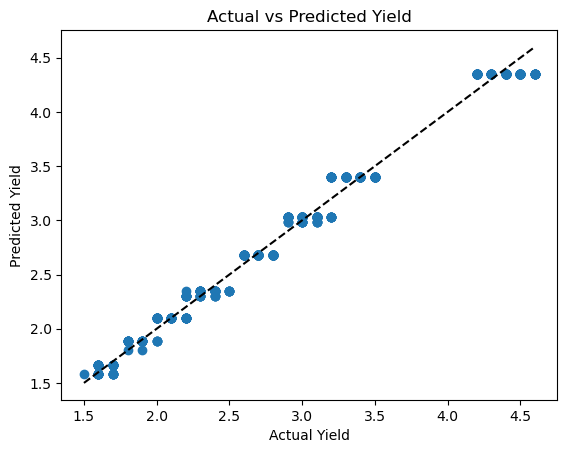

In [47]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_best)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield')
plt.show()